In [17]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models, Sequential
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, ReLU, AveragePooling2D, add

# MNIST Dataset

In [2]:
(mnist_xTrain, mnist_yTrain), (mnist_xTest, mnist_yTest) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('X Train Shape: ', mnist_xTrain.shape)
print('X Test Shape:  ', mnist_xTest.shape)
print('\nY Train Shape: ', mnist_yTrain.shape)
print('Y Test Shape:  ', mnist_yTest.shape)

X Train Shape:  (60000, 28, 28)
X Test Shape:   (10000, 28, 28)

Y Train Shape:  (60000,)
Y Test Shape:   (10000,)


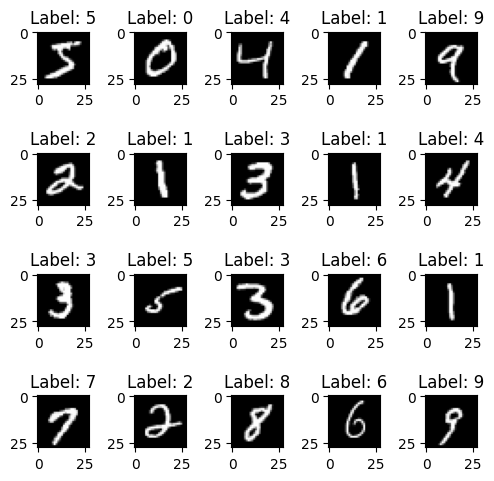

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(5, 5))
axs = axs.flatten()

for i in range(20):
    img = mnist_xTrain[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title("Label: {}".format(mnist_yTrain[i]))

plt.tight_layout()
plt.show()

In [5]:
mnist_yTrain = utils.to_categorical(mnist_yTrain)
mnist_yTest = utils.to_categorical(mnist_yTest)

## VGG-16 Architecutre on MNIST Dataset

In [6]:
from keras.layers import GlobalAveragePooling2D

input_layer = Input(shape=(28, 28, 1))

# Block 1
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(input_layer)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully Connected 1
x = Dense(256, activation='relu')(x)

# Fully Connected 2
x = Dense(256, activation='relu')(x)

# Output Layer (SoftMax)
outputLayer = Dense(10, activation='softmax')(x)

vgg_mnist = Model(inputs=input_layer, outputs=outputLayer)

- Compile the model

In [7]:
vgg_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 28, 28, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 14, 14, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 14, 14, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 7, 7, 128)         0     

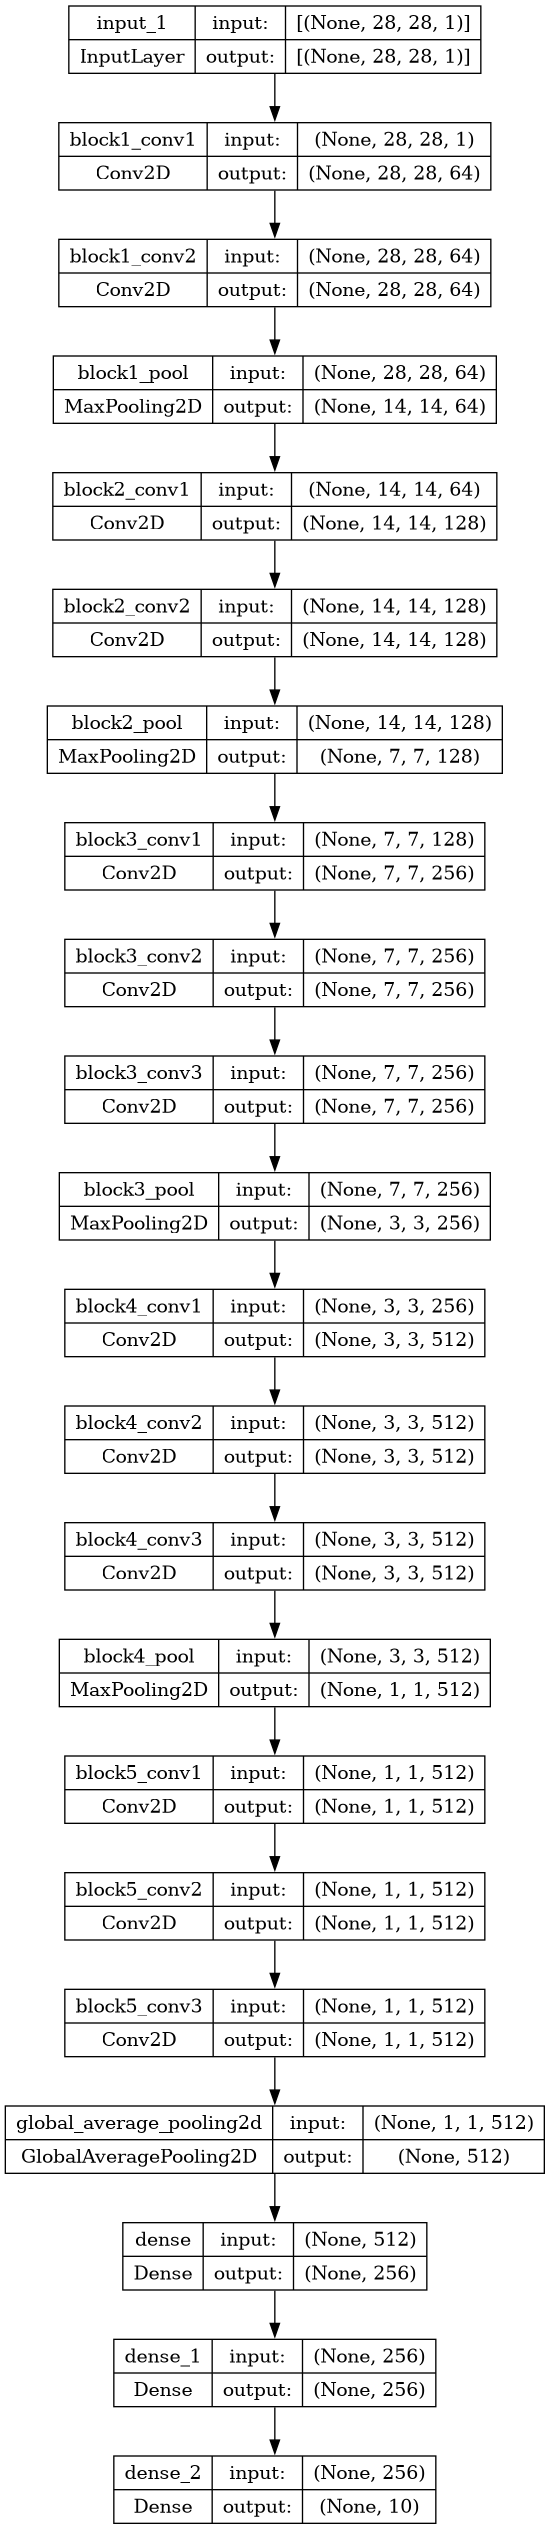

In [8]:
vgg_mnist.summary()
plot_model(vgg_mnist, show_shapes=True, to_file='vgg_model_mnist.png')

- Train Model

In [9]:
vgg_mnist_history = vgg_mnist.fit(mnist_xTrain, mnist_yTrain, validation_data=(mnist_xTest, mnist_yTest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 25ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 -

- Make Predictions

In [10]:
vgg_mnist_perdict = vgg_mnist.predict(mnist_xTest)

vgg_mnist_perdict = [np.argmax(arr) for arr in vgg_mnist_perdict]
print(np.array(vgg_mnist_perdict))

313/313 [==============================] - 2s 6ms/step
[1 1 1 ... 1 1 1]


In [11]:
mnist_ytest = [np.argmax(arr) for arr in mnist_yTest]
print(np.array(mnist_ytest))

[7 2 1 ... 4 5 6]


- Evaluate Model

In [12]:
vgg_mnist.evaluate(mnist_xTest,mnist_yTest)

313/313 [==============================] - 2s 8ms/step - loss: 2.3011 - accuracy: 0.1135


[2.3011085987091064, 0.11349999904632568]

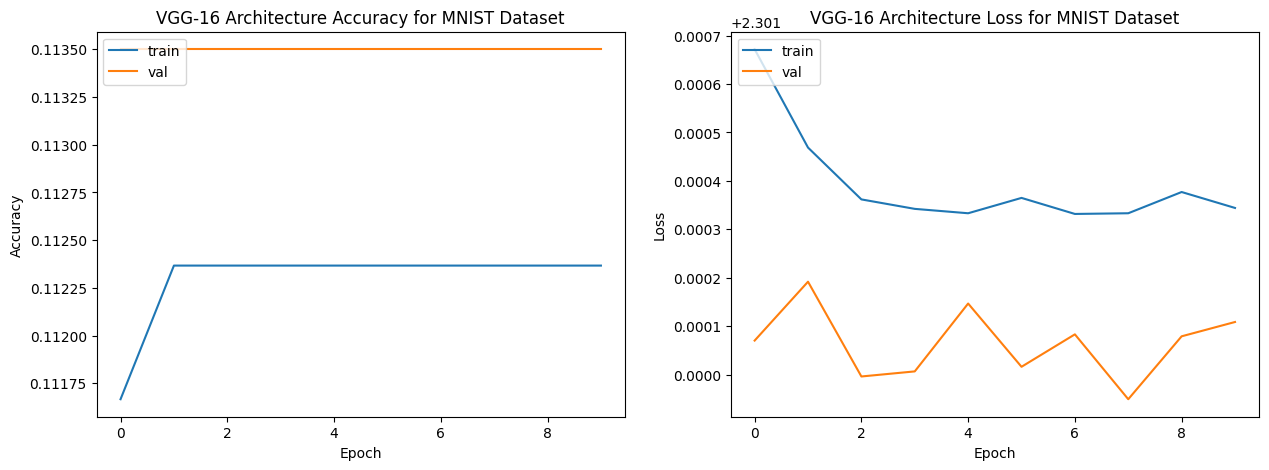

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(vgg_mnist_history.history['accuracy'])
plt.plot(vgg_mnist_history.history['val_accuracy'])
plt.title('VGG-16 Architecture Accuracy for MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(vgg_mnist_history.history['loss'])
plt.plot(vgg_mnist_history.history['val_loss'])
plt.title('VGG-16 Architecture Loss for MNIST Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [14]:
print('Accuracy Score =',round(np.max(vgg_mnist_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 11.35 %


In [ ]:
print(classification_report(mnist_ytest, vgg_mnist_perdict))

## Pretrained VGG-16 on MNIST Dataset

In [19]:
x_train = np.dstack([mnist_xTrain] * 3)
x_test = np.dstack([mnist_xTest] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

In [20]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
pre_vgg_model = models.Sequential()
pre_vgg_model.add(base_model)

# Flatten and add dense layers for MNIST classification
pre_vgg_model.add(layers.Flatten())
pre_vgg_model.add(layers.Dense(256, activation='relu'))
pre_vgg_model.add(layers.Dropout(0.5))
pre_vgg_model.add(layers.Dense(10, activation='softmax'))

x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])

pre_vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 14848586 (56.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
pre_vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
pre_vgg_history = pre_vgg_model.fit(x_train, mnist_yTrain, epochs=10, validation_data=(x_test, mnist_yTest))

Epoch 1/10
1875/1875 [==============================] - 79s 39ms/step - loss: 2.3834 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 -

In [24]:
pretrainedVggMnistPerdict = pre_vgg_model.predict(x_test)

pretrainedVggMnistPerdict = [np.argmax(arr) for arr in pretrainedVggMnistPerdict]
print(np.array(pretrainedVggMnistPerdict))

313/313 [==============================] - 3s 11ms/step
[1 1 1 ... 1 1 1]


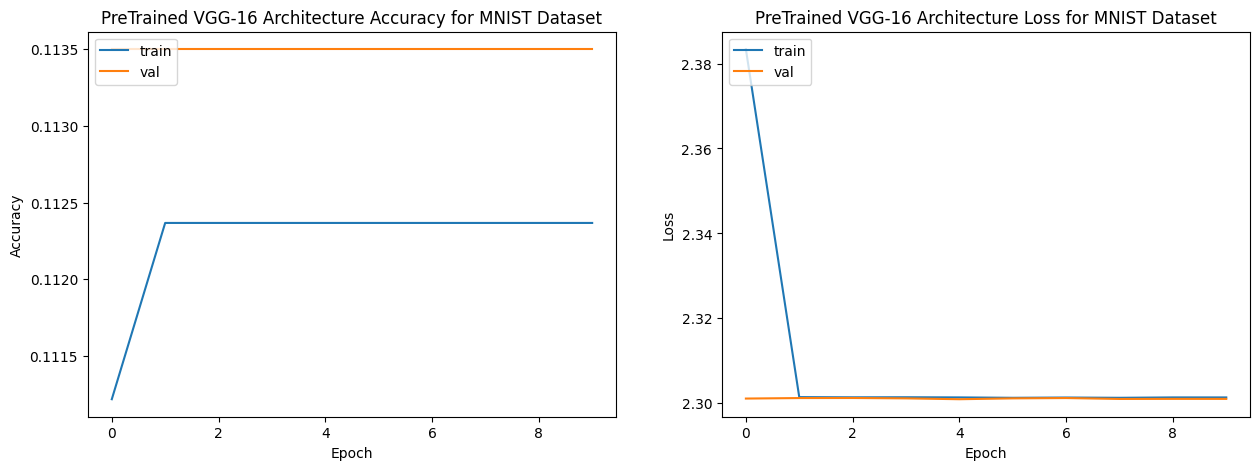

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(pre_vgg_history.history['accuracy'])
plt.plot(pre_vgg_history.history['val_accuracy'])
plt.title('PreTrained VGG-16 Architecture Accuracy for MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(pre_vgg_history.history['loss'])
plt.plot(pre_vgg_history.history['val_loss'])
plt.title('PreTrained VGG-16 Architecture Loss for MNIST Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [26]:
print('Accuracy Score =',round(np.max(pre_vgg_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 11.35 %
